In [6]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.plotting import scatter_matrix

There are 21 csv files in the current version of the dataset:


In [8]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()



In [26]:
def plotEnhancedCorrelationMatrix(df, graphWidth=10, title="Enhanced Correlation Matrix"):
    """
    Plots an enhanced correlation matrix with better aesthetics, automatic formatting,
    and improved readability.
    """
    filename = "correlation_matrix"

    # Drop columns with NaN values
    df = df.dropna(axis=1)

    # Keep only columns with more than 1 unique value
    df = df.loc[:, df.nunique() > 1]

    # Convert columns to numeric, ignoring errors for non-numeric columns
    df = df.apply(pd.to_numeric, errors='coerce')

    # Drop columns that could not be converted (e.g., dates, categorical text)
    df = df.dropna(axis=1)

    # Ensure the DataFrame has at least 2 columns
    if df.shape[1] < 2:
        print("Not enough numeric columns for correlation matrix.")
        return

    # Compute correlation matrix
    corr = df.corr()

    # Set up the matplotlib figure
    plt.figure(figsize=(graphWidth, graphWidth))
    mask = np.triu(np.ones_like(corr, dtype=bool))  # Mask upper triangle for clarity

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Create heatmap with enhanced visual settings
    sns.heatmap(
        corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5,
        cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
    )

    # Improve formatting
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.grid(False)
    plt.show()


In [28]:
def plotEnhancedScatterMatrix(df, plotSize=10, textSize=12, title="Enhanced Scatter Matrix"):
    """
    Plots an enhanced scatter matrix with improved readability and aesthetics.
    """
    # Keep only numerical columns
    df = df.select_dtypes(include=[np.number])

    # Drop columns with NaN values
    df = df.dropna(axis=1)

    # Keep only columns with more than 1 unique value
    df = df.loc[:, df.nunique() > 1]

    # Ensure the DataFrame has at least 2 numeric columns
    if df.shape[1] < 2:
        print("Not enough valid numeric columns for scatter matrix.")
        return

    # Set figure size and style
    plt.style.use("seaborn-darkgrid")
    plt.figure(figsize=(plotSize, plotSize))

    # Create scatter matrix plot with KDE for diagonals
    scatter_matrix(df, figsize=(plotSize, plotSize), diagonal='kde', alpha=0.75,
                   hist_kwds={'edgecolor': 'black'}, marker='o', color='blue')

    # Adjust text size for better readability
    plt.xticks(fontsize=textSize, rotation=45, ha='right')
    plt.yticks(fontsize=textSize)
    plt.suptitle(title, fontsize=14, fontweight='bold')
    plt.show()



Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: all_stocks_5yr.csv

In [29]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# all_stocks_5yr.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/all_stocks_5yr.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'all_stocks_5yr.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 7 columns


Let's take a look at what the data looks like:

In [30]:
df1.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


Distribution graphs (histogram/bar graph) of sampled columns:

In [31]:
plotPerColumnDistribution(df1, 10, 5)

<Figure size 2400x512 with 0 Axes>

Correlation matrix:

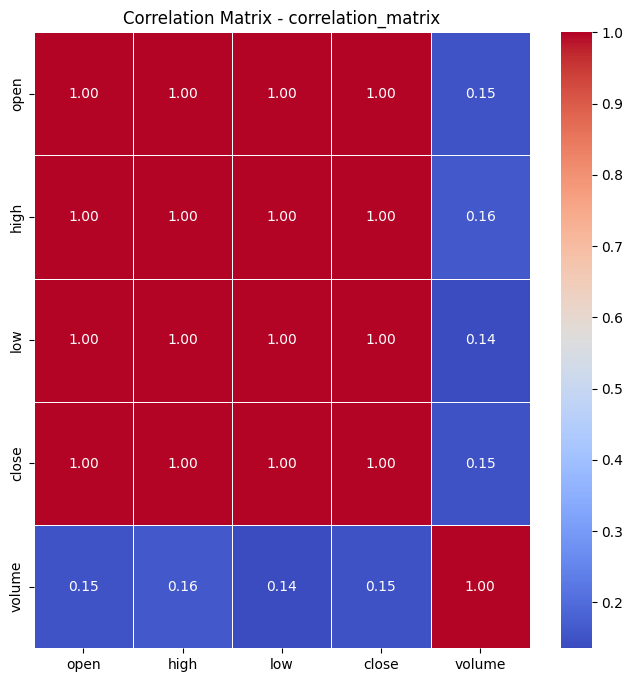

In [32]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

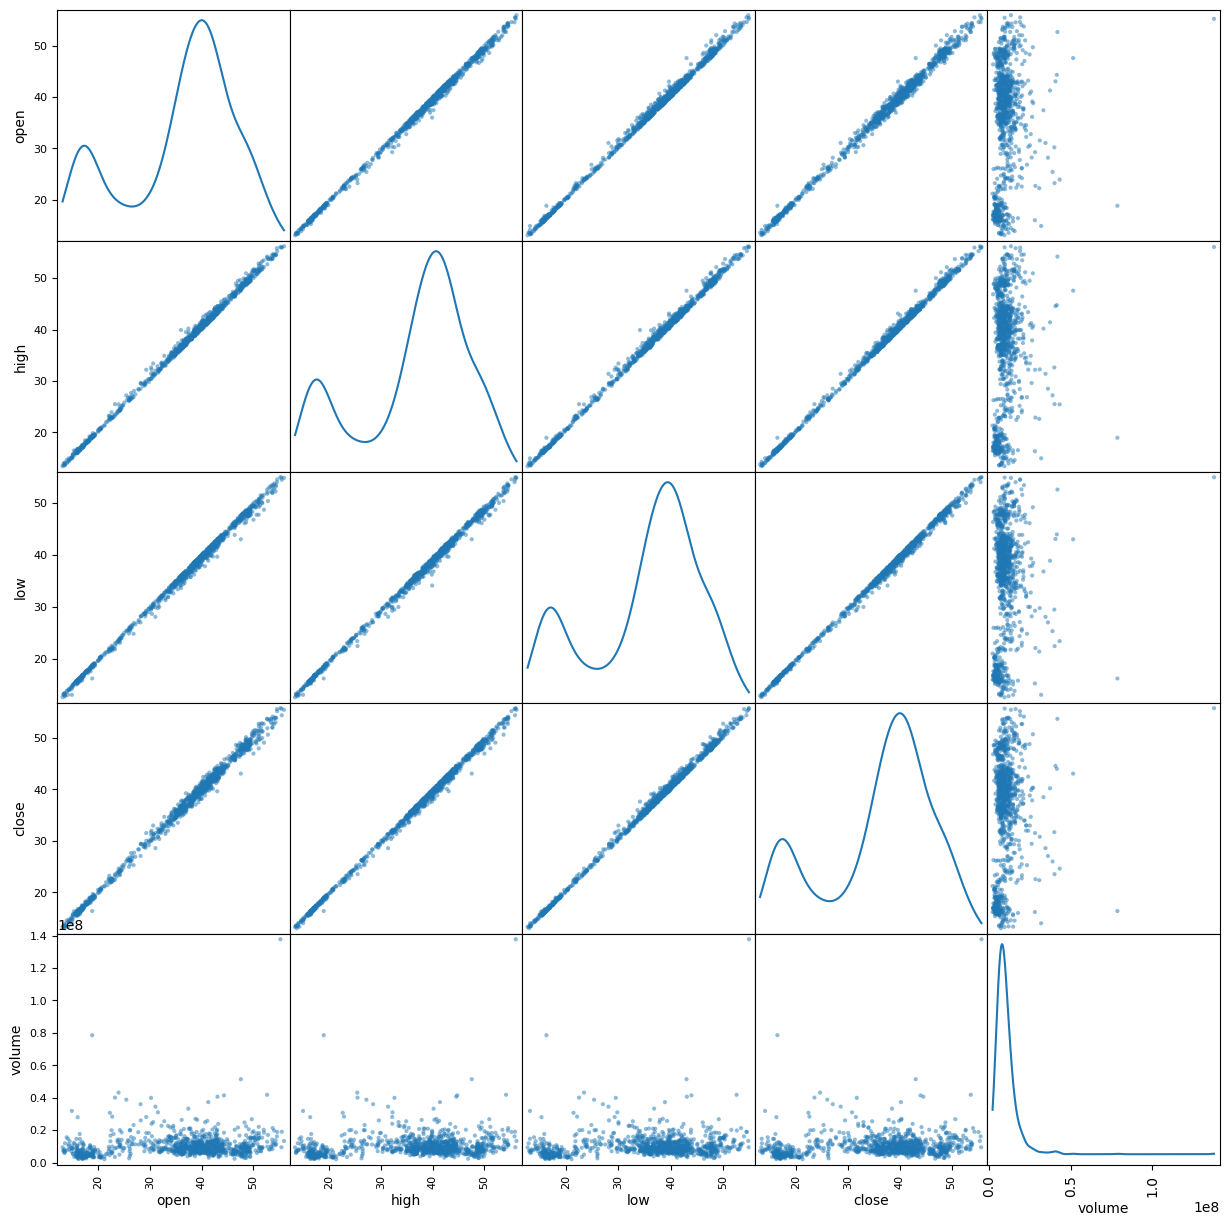

In [33]:
plotScatterMatrix(df1, 15, 10)

### Let's check 2nd file: ABC_data.csv

In [34]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# ABC_data.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/content/ABC_data.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'ABC_data.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 7 columns


Let's take a quick look at what the data looks like:

In [35]:
df2.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,46.52,46.895,46.46,46.89,1232802,ABC
1,2013-02-11,46.85,47.000,46.50,46.76,1115888,ABC
2,2013-02-12,46.70,47.050,46.60,46.96,1318773,ABC
3,2013-02-13,46.74,46.900,46.60,46.64,2645247,ABC
4,2013-02-14,46.67,46.990,46.60,46.77,1941879,ABC


Distribution graphs (histogram/bar graph) of sampled columns:

In [36]:
plotPerColumnDistribution(df2, 10, 5)

<Figure size 2400x512 with 0 Axes>

Correlation matrix:

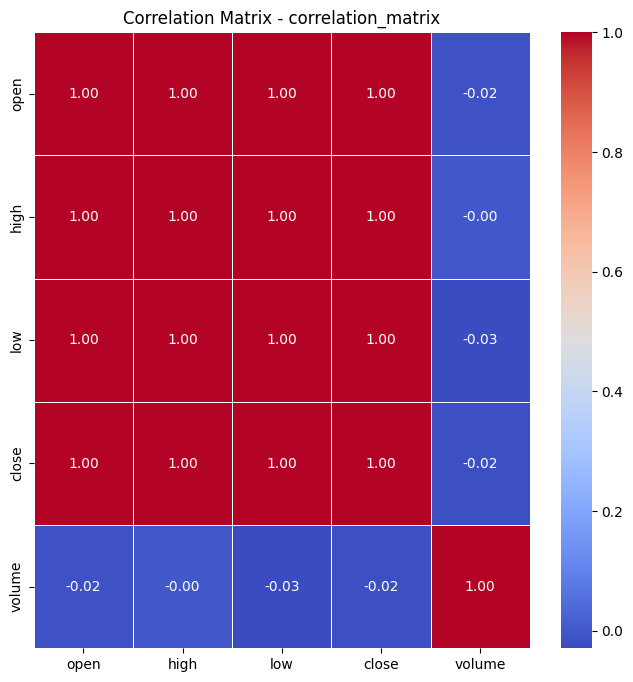

In [37]:
plotCorrelationMatrix(df2, 8)

Scatter and density plots:

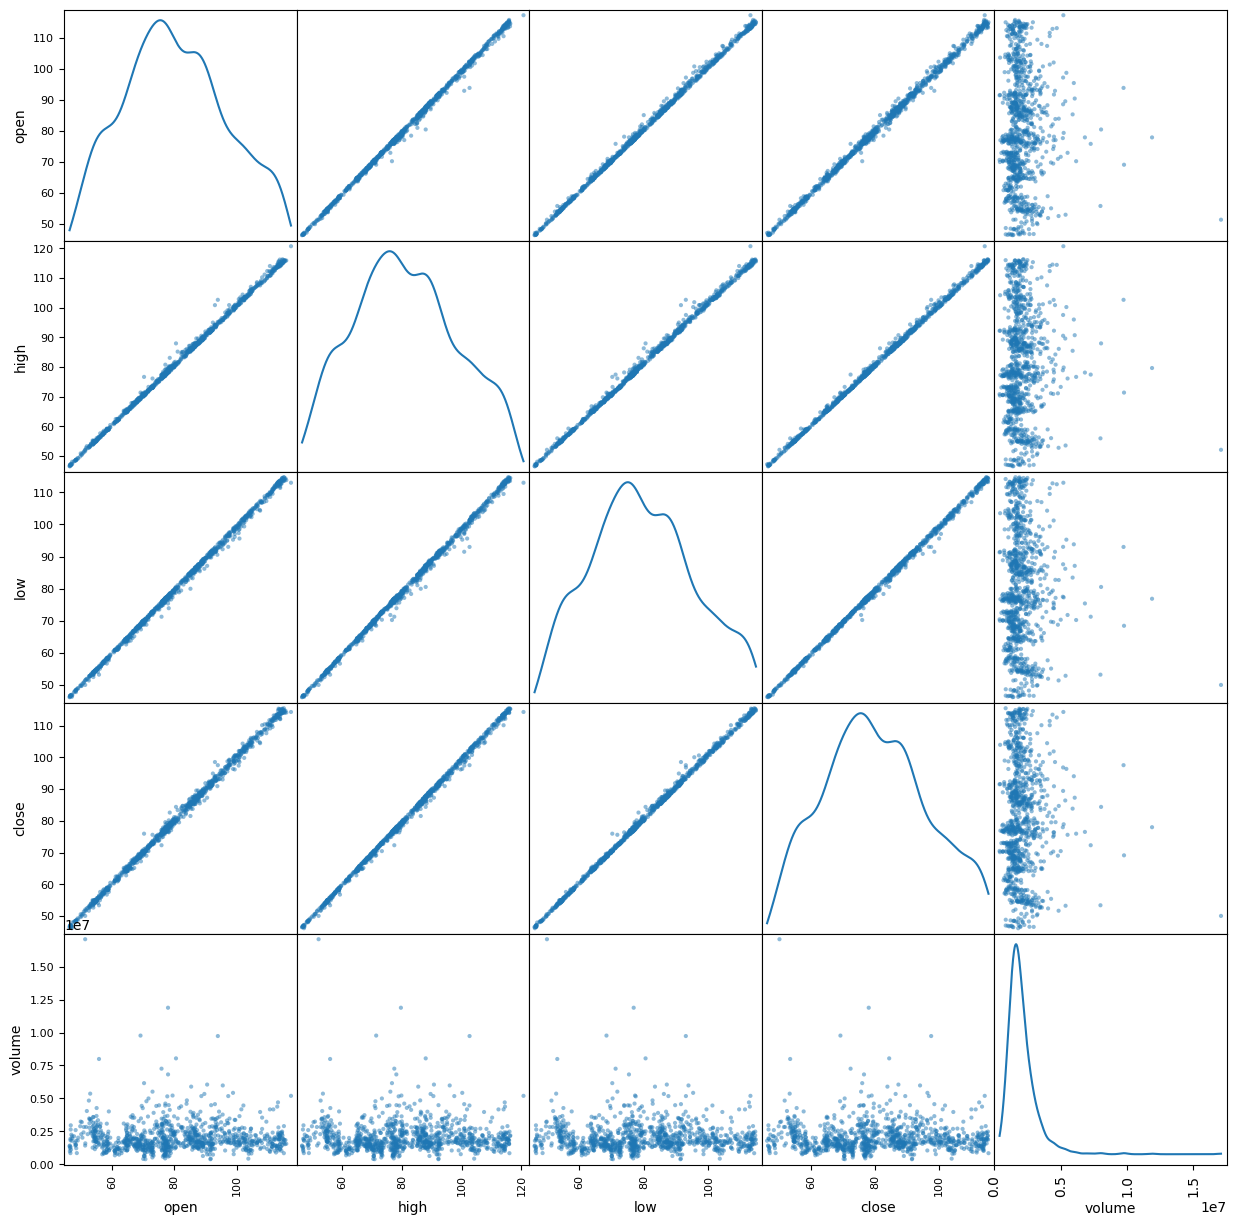

In [38]:
plotScatterMatrix(df2, 15, 10)

### Let's check 3rd file: AEE_data.csv

In [39]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# AEE_data.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('/content/AEE_data.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'AEE_data.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 7 columns


Let's take a quick look at what the data looks like:

In [40]:
df3.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,32.79,32.79,32.4900,32.61,1834481,AEE
1,2013-02-11,32.65,32.88,32.6500,32.84,1287610,AEE
2,2013-02-12,32.83,33.16,32.7201,33.15,1875404,AEE
3,2013-02-13,33.20,33.39,33.1200,33.28,1677370,AEE
4,2013-02-14,33.20,33.24,32.9400,33.14,1489040,AEE


Distribution graphs (histogram/bar graph) of sampled columns:

In [41]:
plotPerColumnDistribution(df3, 10, 5)

<Figure size 2400x512 with 0 Axes>

Correlation matrix:

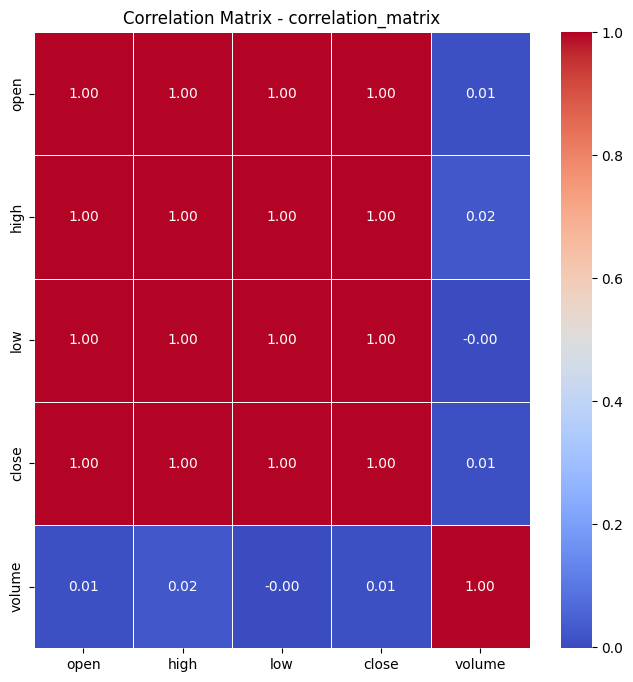

In [42]:
plotCorrelationMatrix(df3, 8)

Scatter and density plots:

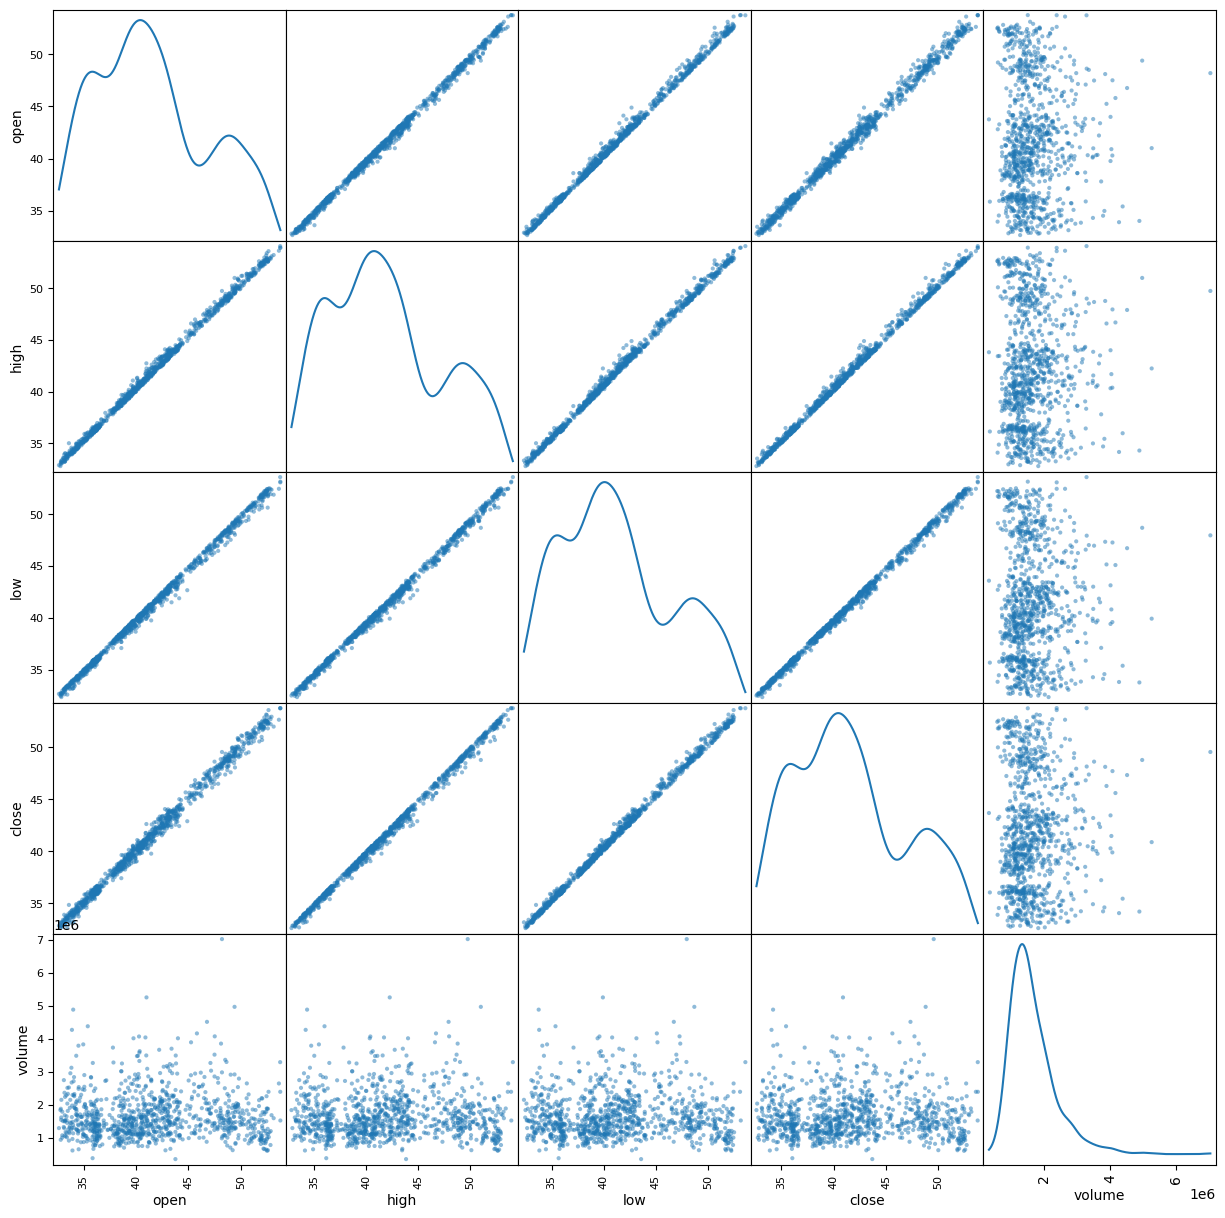

In [43]:
plotScatterMatrix(df3, 15, 10)